In [33]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from tikzplotlib import save as tikz_save
import sympy as sp

In [34]:
pi=np.pi

#a=2.12e-5
a=0.025
b=a
T1=40.


x=np.linspace(0,a,200)
y=np.linspace(0,b,200)
mx,my=np.meshgrid(x,y)
dx = np.diff(x).min()
sumat=[]
for n in range(1,100):
    sumat.append(2*(1-(-1)**n) / (np.pi*n*np.sinh(n*np.pi*b/a))*np.sin(n*np.pi*mx/a)*np.sinh(n*pi*my/a))
sumat=np.asarray(sumat)
T=np.sum(sumat,0)*T1

dTdy,dTdx = np.gradient(-T)

dQ = (dTdx**2+dTdy**2)**.5 
sing_dT = (dTdx**2+dTdy**2)
if sing_dT.all()!=0:
    dTdx = dTdx / (dTdx**2+dTdy**2)**.5
    dTdy = dTdy / (dTdx**2+dTdy**2)**.5

#dQ = dQ/20.

niveles = np.linspace(0.1,1.8,20)

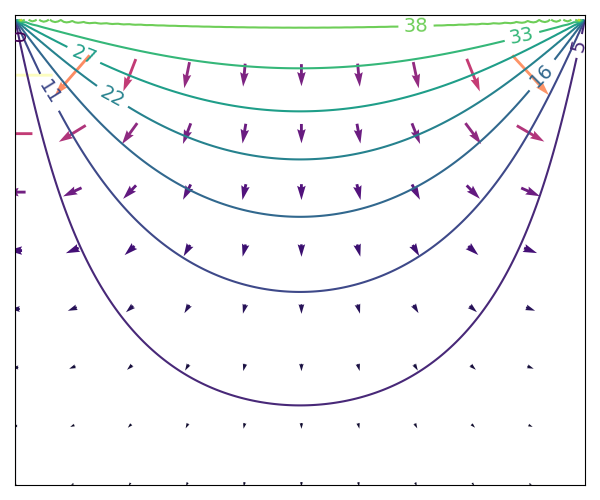

In [35]:
nx=20
fig0,ax0 = plt.subplots(figsize=(6,5))
cs1 = ax0.contour(x,y,T,levels=np.linspace(0,50,10))
ax0.quiver(x[::nx],y[::nx],dTdx[::nx][:,::nx],dTdy[::nx][:,::nx],
           np.arcsinh(dQ[::nx][:,::nx]),scale=10,width=.005,cmap='magma',
           headwidth=3,angles='xy',pivot='middle')
ax0.clabel(cs1,fmt='%0d',inline_spacing=2,fontsize=14)
ax0.set_ylim([0.005,0.0252])
#ax0.set_axis_off()
ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])
fig0.tight_layout()
#tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/introduccion_tcm/tikz_images/isoT_isoQ_b.tikz')
#tikz_save('/home/juan/Documents/Ensenanza/latex/apuntes/introduccion_tcm/tikz_images/isoT_isoQ.tikz')
#fig0.savefig('/home/juan/Documents/Ensenanza/latex/apuntes/introduccion_tcm/tikz_images/isoT_isoQ_b.pdf')
#tikz_save('isotermas1.tikz')

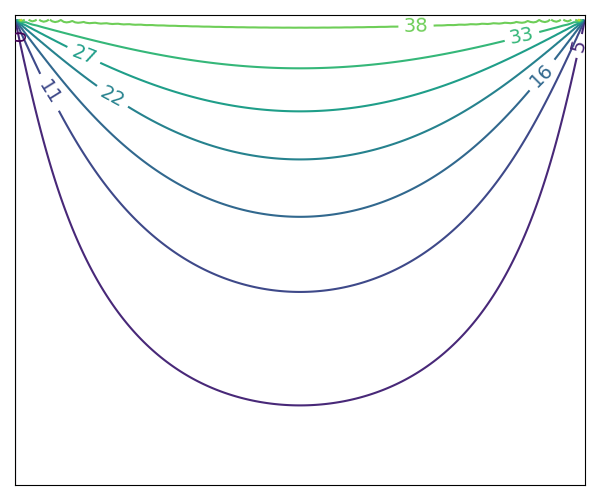

In [36]:
nx=20
fig0,ax0 = plt.subplots(figsize=(6,5))
cs1 = ax0.contour(x,y,T,levels=np.linspace(0,50,10))
#ax0.quiver(x[::nx],y[::nx],dTdx[::nx][:,::nx],dTdy[::nx][:,::nx],
           #np.arcsinh(dQ[::nx][:,::nx]),scale=10,width=.005,cmap='magma',
           #headwidth=3,angles='xy',pivot='middle')
ax0.clabel(cs1,fmt='%0d',inline_spacing=2,fontsize=14)
ax0.set_ylim([0.005,0.0252])
#ax0.set_axis_off()
ax0.axes.get_xaxis().set_ticks([])
ax0.axes.get_yaxis().set_ticks([])
fig0.tight_layout()
tikz_save('isotermas1.tikz')